In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-salaries/Salaries.csv
/kaggle/input/sf-salaries/database.sqlite


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
df=pd.read_csv('/kaggle/input/sf-salaries/Salaries.csv')
data=df.copy()

/tmp/ipykernel_32/102151689.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/sf-salaries/Salaries.csv')


# Display first 10 rows of the dataset

In [96]:
data.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


# Display last 10 rows of the dataset 

In [97]:
data.tail(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


# Find number of rows and columns

In [98]:
data.shape

(148654, 13)

# Get a breif overview of the dataset

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


# Check Null Values In The Dataset

In [100]:
data.isnull()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,False,False,False,False,False,False,True,False,False,False,True,False,True
1,False,False,False,False,False,False,True,False,False,False,True,False,True
2,False,False,False,False,False,False,True,False,False,False,True,False,True
3,False,False,False,False,False,False,True,False,False,False,True,False,True
4,False,False,False,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,False,False,False,False,False,False,False,False,False,False,True,False,False
148650,False,False,False,False,False,False,False,False,False,False,True,False,True
148651,False,False,False,False,False,False,False,False,False,False,True,False,True
148652,False,False,False,False,False,False,False,False,False,False,True,False,True


In [101]:
data.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

# Get Overall Statistics About The Dataframe

In [102]:
data.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


# Find Occurrence of The Employee Names  (Top 5)

In [103]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [104]:
data['EmployeeName'].value_counts().head(5)

EmployeeName
Kevin Lee       13
Richard Lee     11
Steven Lee      11
William Wong    11
Stanley Lee      9
Name: count, dtype: int64

# Find The Number of Unique Job Titles

In [105]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [106]:
data.JobTitle.value_counts().count()

2159

In [107]:
data.JobTitle.nunique()

2159

# Total Number of Job Titles Contain Captain

In [108]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [109]:
#first way adding all True values True = 1
data['JobTitle'].str.contains('CAPTAIN',case=False).sum()

552

In [110]:
len(data[data['JobTitle'].str.contains('CAPTAIN',case=False)])

552

# Display All the Employee Names From Fire Department

In [111]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [112]:
data[data["JobTitle"].str.contains('Fire',case =False)]['EmployeeName']

4            PATRICK GARDNER
6                  ALSON LEE
8             MICHAEL MORRIS
9         JOANNE HAYES-WHITE
10             ARTHUR KENNEY
                 ...        
145956      Kenneth C Farris
147556         Edward A Dunn
148021        Kari A Johnson
148209          Sheryl K Lee
148554       Lawrence F Gatt
Name: EmployeeName, Length: 5879, dtype: object

# Find Minimum, Maximum, and Average BasePay

In [113]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [114]:
data['BasePay']

0            167411.18
1            155966.02
2            212739.13
3              77916.0
4             134401.6
              ...     
148649            0.00
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653            0.00
Name: BasePay, Length: 148654, dtype: object

In [115]:
data["BasePay"]=data["BasePay"].replace('Not Provided',np.nan).astype(float)

In [116]:
data['BasePay'].describe()

count    148045.000000
mean      66325.448840
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64

# Replace 'Not Provided' in EmployeeName' Column to NaN 

In [117]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [118]:
data['EmployeeName']

0            NATHANIEL FORD
1              GARY JIMENEZ
2            ALBERT PARDINI
3         CHRISTOPHER CHONG
4           PATRICK GARDNER
                ...        
148649        Roy I Tillery
148650         Not provided
148651         Not provided
148652         Not provided
148653            Joe Lopez
Name: EmployeeName, Length: 148654, dtype: object

In [119]:
data['EmployeeName'].replace('Not provided',np.nan)

0            NATHANIEL FORD
1              GARY JIMENEZ
2            ALBERT PARDINI
3         CHRISTOPHER CHONG
4           PATRICK GARDNER
                ...        
148649        Roy I Tillery
148650                  NaN
148651                  NaN
148652                  NaN
148653            Joe Lopez
Name: EmployeeName, Length: 148654, dtype: object

# Find the Job title of Albert Pardini

In [120]:
data[data['EmployeeName']=='Albert Pardini']['JobTitle']

36519    Captain 3
Name: JobTitle, dtype: object

# How much Albert Pardini make (Including Benefits)?

In [121]:
data["Benefits"]

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
148649            0.00
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653            0.00
Name: Benefits, Length: 148654, dtype: object

In [122]:
data['Benefits']=data['Benefits'].replace('Not Provided',np.nan).dropna(inplace=True)

In [123]:
data["OvertimePay"]

0                  0.0
1            245131.88
2            106088.18
3             56120.71
4               9737.0
              ...     
148649            0.00
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653            0.00
Name: OvertimePay, Length: 148654, dtype: object

In [124]:
data['OvertimePay']=data['OvertimePay'].replace('Not Provided',np.nan).dropna()

In [125]:
data['OtherPay']

0            400184.25
1            137811.38
2              16452.6
3             198306.9
4            182234.59
              ...     
148649            0.00
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653         -618.13
Name: OtherPay, Length: 148654, dtype: object

In [126]:
data['OtherPay']=data['OtherPay'].replace('Not Provided',np.nan).dropna(inplace=True)

In [127]:
data['Benefits']=data['Benefits'].astype(float)
data['BasePay']=data['BasePay'].astype(float)
data['OvertimePay']=data['OvertimePay'].astype(float)
data['OtherPay']=data['OtherPay'].astype(float)

In [128]:
data[data['EmployeeName']=="Albert Pardini"][["TotalPayBenefits"]]


,TotalPayBenefits
36519,253995.29


# Display name of the person having the highest Basepay

In [129]:
max_base_pay=data.BasePay.max()

In [130]:
data[data.BasePay==max_base_pay]["EmployeeName"]

72925    Gregory P Suhr
Name: EmployeeName, dtype: object

# Find AverageBasePay of all Employee per year

In [131]:
data[['Year','BasePay']].groupby('Year').mean('BasePay')

,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,69630.030216
2014,66564.421924


# Find average basepay  of all Employee per job title

In [132]:
data[['JobTitle','BasePay']].groupby(by='JobTitle').mean('BasePay')

,BasePay
JobTitle,
ACCOUNT CLERK,43300.806506
ACCOUNTANT,46643.172000
ACCOUNTANT INTERN,28732.663958
"ACPO,JuvP, Juv Prob (SFERS)",62290.780000
ACUPUNCTURIST,66374.400000
...,...
X-RAY LABORATORY AIDE,47664.773077
X-Ray Laboratory Aide,46086.387100
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",52609.910000


# Find average basepay of the Employee having job title Accountant

In [133]:
data[data['JobTitle']=='ACCOUNTANT']['BasePay'].mean()

46643.172

# Find top 5 most common jobs

In [134]:
data.groupby(by='JobTitle').size().sort_values(ascending=False).head(5)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
dtype: int64

In [135]:
data["JobTitle"].value_counts().head(5)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64

Text(0, 0.5, 'Top 5 most common job')

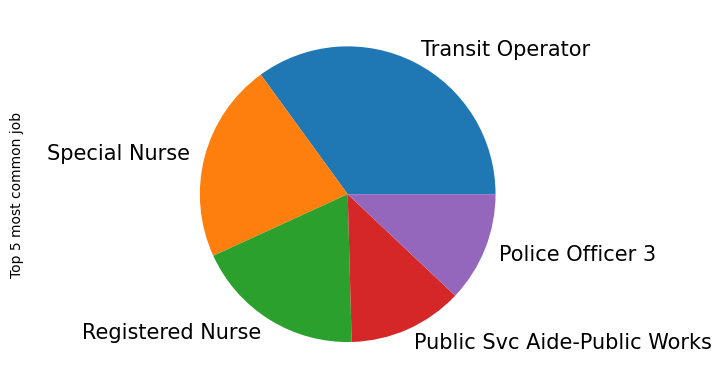

In [136]:

data.JobTitle.value_counts().head().plot(kind='pie',fontsize=15,ylabel='').set_ylabel('Top 5 most common job', labelpad=100)

In [138]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [142]:
data["BasePay"].dropna()

0         167411.18
1         155966.02
2         212739.13
3          77916.00
4         134401.60
            ...    
148645         0.00
148647         0.00
148648         0.00
148649         0.00
148653         0.00
Name: BasePay, Length: 148045, dtype: float64

<Axes: xlabel='BasePay', ylabel='Pay in dollars'>

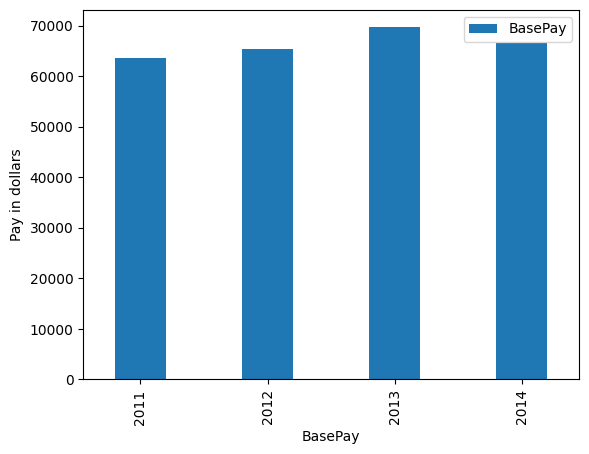

In [176]:
data.pivot_table(index="Year",values='BasePay',aggfunc='mean').plot(kind='bar',xlabel='Average basepay ',ylabel='Pay in dollars',width=0.4)